In [1]:
%pwd

'C:\\Users\\Ravik\\linkedindatascience\\Ex_Files_Data_Science_Python\\Ex_Files_Data_Science_Python\\Exercise Files\\Ch04\\04_04'

In [59]:
ju

SyntaxError: invalid syntax (<ipython-input-59-0bef2453eda9>, line 1)

In [3]:
import os
from os import path
pname=path.expanduser(r"C:\\Users\\Ravik\\linkedindatascience\\Ex_Files_Data_Science_Python\\Ex_Files_Data_Science_Python\\Exercise Files\\Ch04\\04_04\track.csv")

In [4]:
with open(pname) as pn:
    for lnum,line in enumerate(pn):
        if lnum>10:
            break
        print(line[:-1])

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219
2015-08-20 03:48:37.708,35.014515,32.519625,121.69999694824219


In [5]:
#time in general taken as object by python in place of the if we parse the time then the dtype will become timedelta64#
import pandas as pd
df=pd.read_csv(pname,parse_dates=['time'])

In [6]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [ ]:
df.info()

In [ ]:
df.describe()

In [9]:
#making timestamp as index to the data
df.index=df['time']

In [10]:
df.head()

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [7]:
#localizing the time 
import pytz

In [11]:
df.index=df.index.tz_localize(pytz.UTC).tz_convert('Asia/Kolkata')

In [12]:
df.head()

,time,lat,lng,height
time,,,,
2015-08-20 09:18:07.235000+05:30,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 09:18:24.734000+05:30,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 09:18:25.660000+05:30,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 09:18:26.819000+05:30,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 09:18:27.828000+05:30,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


In [13]:
import geo

In [14]:
from geo import circle_dist as cd

In [15]:
dist=cd(df['lat'],df['lng'],df['lat'].shift(),df['lng'].shift())

In [16]:
dist.sum()

4.688120727961869

In [17]:
dt=df['time']-df['time'].shift()

In [18]:
dt.sum()

Timedelta('0 days 00:32:35.094000')

In [19]:
df['dist']=dist
df['dt']=dt
df.head()

,time,lat,lng,height,dist,dt
time,,,,,,
2015-08-20 09:18:07.235000+05:30,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997,NaN,NaT
2015-08-20 09:18:24.734000+05:30,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998,0.007694,0 days 00:00:17.499000
2015-08-20 09:18:25.660000+05:30,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000,0.009248,0 days 00:00:00.926000
2015-08-20 09:18:26.819000+05:30,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000,0.006479,0 days 00:00:01.159000
2015-08-20 09:18:27.828000+05:30,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002,0.006219,0 days 00:00:01.009000


In [20]:
import numpy as np

In [21]:
#converting time array to float per one hour
speed=df['dist']/(df['dt']/np.timedelta64(1,'h'))

In [22]:
speed

time
2015-08-20 09:18:07.235000+05:30          NaN
2015-08-20 09:18:24.734000+05:30     1.582842
2015-08-20 09:18:25.660000+05:30    35.952444
2015-08-20 09:18:26.819000+05:30    20.123165
2015-08-20 09:18:27.828000+05:30    22.187213
                                      ...    
2015-08-20 09:50:28.982000+05:30    12.900150
2015-08-20 09:50:29.923000+05:30    14.586780
2015-08-20 09:50:32.863000+05:30    11.866076
2015-08-20 09:50:33.994000+05:30     6.194818
2015-08-20 09:50:42.329000+05:30     3.039668
Length: 740, dtype: float64

<AxesSubplot:xlabel='time'>

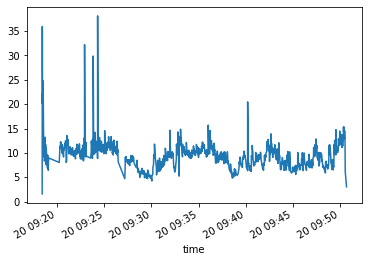

In [23]:
%matplotlib inline
speed.plot()

In [24]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[6,4]
plt.style.use('seaborn-whitegrid')

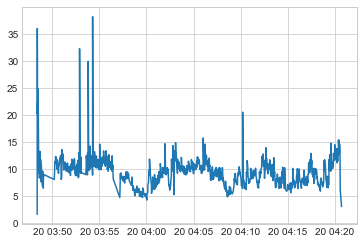

In [25]:
plt.plot(speed)

In [26]:
#sampline data for  1 min intervals and sum up in the intervals between

In [27]:
df['dt']=df['dt']/np.timedelta64(1,'h') #to float 

In [28]:
df1m=df.resample('1min').sum()

In [29]:
df1m.head()

,lat,lng,height,dist,dt
time,,,,,
2015-08-20 09:18:00+05:30,735.305982,682.909176,2578.099991,0.118358,0.014563
2015-08-20 09:19:00+05:30,105.042949,97.556914,368.900002,0.017011,0.002244
2015-08-20 09:20:00+05:30,805.323270,747.896930,2635.199989,0.278882,0.030552
2015-08-20 09:21:00+05:30,1050.415915,975.487935,3199.600014,0.170443,0.016677
2015-08-20 09:22:00+05:30,1050.382332,975.454219,2931.299995,0.171138,0.016921


In [30]:
speed1m=df1m['dist']/df1m['dt']

In [31]:
speed1m.sum()

285.7201721571146

<AxesSubplot:xlabel='time'>

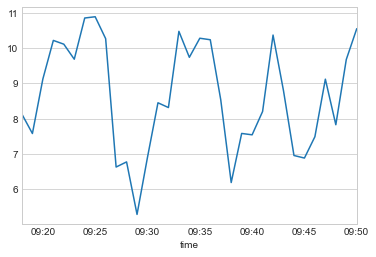

In [32]:
speed1m.plot()

<AxesSubplot:xlabel='time'>

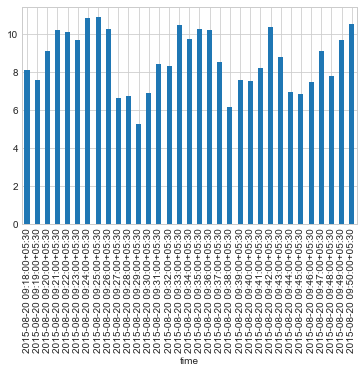

In [33]:
speed1m.plot(kind='bar')

# tracking on a map

In [34]:
import folium

In [35]:
m=folium.Map(location=[df['lng'].mean(),df['lat'].mean()],zoom_start=19)

In [36]:
def add_marker(row):
    marker=folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'))
    marker.add_to(m)
#df.apply(add_marker,axis=1)

In [37]:
m

In [ ]:
#alot of overlapping so taking a sample

In [38]:
mdf=df.resample('T').mean()

In [39]:
mdf.columns

Index(['lat', 'lng', 'height', 'dist', 'dt'], dtype='object')

In [40]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33 entries, 2015-08-20 09:18:00+05:30 to 2015-08-20 09:50:00+05:30
Freq: T
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lat     33 non-null     float64
 1   lng     33 non-null     float64
 2   height  33 non-null     float64
 3   dist    33 non-null     float64
 4   dt      33 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


In [41]:
mdf

,lat,lng,height,dist,dt
time,,,,,
2015-08-20 09:18:00+05:30,35.014571,32.519485,122.766666,0.005918,0.000728
2015-08-20 09:19:00+05:30,35.014316,32.518971,122.966667,0.005670,0.000748
2015-08-20 09:20:00+05:30,35.014055,32.517258,114.573913,0.012125,0.001328
2015-08-20 09:21:00+05:30,35.013864,32.516264,106.653334,0.005681,0.000556
2015-08-20 09:22:00+05:30,35.012744,32.515141,97.710000,0.005705,0.000564
2015-08-20 09:23:00+05:30,35.013241,32.514047,104.331249,0.009938,0.001026
2015-08-20 09:24:00+05:30,35.012358,32.513381,98.233333,0.006123,0.000564
2015-08-20 09:25:00+05:30,35.010811,32.512796,87.182143,0.006376,0.000585
2015-08-20 09:26:00+05:30,35.009665,32.512374,82.606667,0.005949,0.000579


In [42]:
mdf.apply(add_marker,axis=1)

time
2015-08-20 09:18:00+05:30    None
2015-08-20 09:19:00+05:30    None
2015-08-20 09:20:00+05:30    None
2015-08-20 09:21:00+05:30    None
2015-08-20 09:22:00+05:30    None
2015-08-20 09:23:00+05:30    None
2015-08-20 09:24:00+05:30    None
2015-08-20 09:25:00+05:30    None
2015-08-20 09:26:00+05:30    None
2015-08-20 09:27:00+05:30    None
2015-08-20 09:28:00+05:30    None
2015-08-20 09:29:00+05:30    None
2015-08-20 09:30:00+05:30    None
2015-08-20 09:31:00+05:30    None
2015-08-20 09:32:00+05:30    None
2015-08-20 09:33:00+05:30    None
2015-08-20 09:34:00+05:30    None
2015-08-20 09:35:00+05:30    None
2015-08-20 09:36:00+05:30    None
2015-08-20 09:37:00+05:30    None
2015-08-20 09:38:00+05:30    None
2015-08-20 09:39:00+05:30    None
2015-08-20 09:40:00+05:30    None
2015-08-20 09:41:00+05:30    None
2015-08-20 09:42:00+05:30    None
2015-08-20 09:43:00+05:30    None
2015-08-20 09:44:00+05:30    None
2015-08-20 09:45:00+05:30    None
2015-08-20 09:46:00+05:30    None
2015-08-2

In [43]:
m

In [44]:
import shapely

In [45]:
from shapely.geometry import Point,Polygon

In [46]:
mdf['pt']=mdf[['lng','lat']].apply(Point,axis=1)

In [47]:
mdf.head()

,lat,lng,height,dist,dt,pt
time,,,,,,
2015-08-20 09:18:00+05:30,35.014571,32.519485,122.766666,0.005918,0.000728,POINT (32.51948457142857 35.01457057142857)
2015-08-20 09:19:00+05:30,35.014316,32.518971,122.966667,0.005670,0.000748,POINT (32.51897133333333 35.01431633333333)
2015-08-20 09:20:00+05:30,35.014055,32.517258,114.573913,0.012125,0.001328,POINT (32.51725782608697 35.0140552173913)
2015-08-20 09:21:00+05:30,35.013864,32.516264,106.653334,0.005681,0.000556,POINT (32.5162645 35.01386383333332)
2015-08-20 09:22:00+05:30,35.012744,32.515141,97.710000,0.005705,0.000564,POINT (32.51514063333333 35.0127444)


In [48]:
mean_lng, max_lng = mdf['lng'].mean(), mdf['lng'].max()
mean_lat, max_lat = mdf['lat'].mean(), mdf['lat'].max()
poly = Polygon([
    [mean_lng, mean_lat],
    [mean_lng, max_lat],
    [max_lng, max_lat],
    [max_lng, mean_lat]
])

In [49]:
poly.exterior.xy

(array('d', [32.5123189947394, 32.5123189947394, 32.51948457142857, 32.51948457142857, 32.5123189947394]),
 array('d', [35.01567806812503, 35.02252776190477, 35.02252776190477, 35.01567806812503, 35.01567806812503]))

In [50]:
s=np.stack(poly.exterior.xy).T

In [51]:
def add_marker(row):
    color = 'yellow' if poly.intersects(row['pt']) else 'green'
    marker = folium.CircleMarker([row['lng'], row['lat']], radius=5, color='red', popup=row.name.strftime('%H:%M'),
                                fill_color=color)
    marker.add_to(m)
m.add_child(folium.PolyLine(s, color='yellow'))
mdf.apply(add_marker, axis=1)
m

In [56]:
poly.area

4.908200607605864e-05